In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.linear_model
mnk = sklearn.linear_model.LinearRegression()

In [2]:
temp = pd.read_csv("pmsm_temperature_data.csv")
temp.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [4]:
temp.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [5]:
temp.iloc[:, 0:13].describe().round(2).T.iloc[:, 1:]

,mean,std,min,25%,50%,75%,max
ambient,-0.00,0.99,-8.57,-0.60,0.27,0.69,2.97
coolant,0.00,1.00,-1.43,-1.04,-0.18,0.65,2.65
u_d,0.00,1.00,-1.66,-0.83,0.27,0.36,2.27
u_q,-0.01,1.00,-1.86,-0.93,-0.10,0.85,1.79
motor_speed,-0.01,1.00,-1.37,-0.95,-0.14,0.85,2.02
torque,-0.00,1.00,-3.35,-0.27,-0.19,0.55,3.02
i_d,0.01,1.00,-3.25,-0.76,0.21,1.01,1.06
i_q,-0.00,1.00,-3.34,-0.26,-0.19,0.50,2.91
pm,-0.00,1.00,-2.63,-0.67,0.09,0.68,2.92
stator_yoke,0.00,1.00,-1.83,-0.75,-0.06,0.70,2.45


In [6]:
temp.dtypes.value_counts()

float64    12
int64       1
dtype: int64

In [7]:
temp.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [8]:
temp.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [9]:
corr_temp = temp.corr()

In [10]:
corr_temp.shape

(13, 13)

In [11]:
corr_temp

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
ambient,1.000000,0.434435,0.194754,0.087430,0.078283,-0.262264,0.005605,-0.260562,0.501496,0.451616,0.396742,0.301883,0.384565
coolant,0.434435,1.000000,0.178708,0.027851,-0.033332,-0.189617,0.108489,-0.186060,0.430548,0.874037,0.689003,0.509298,0.499669
u_d,0.194754,0.178708,1.000000,-0.027472,-0.233828,-0.821325,0.358517,-0.796586,-0.082564,0.041428,-0.066256,-0.150714,0.300771
u_q,0.087430,0.027851,-0.027472,1.000000,0.716897,-0.037262,-0.181855,-0.026348,0.101236,0.106186,0.149017,0.125445,-0.122260
motor_speed,0.078283,-0.033332,-0.233828,0.716897,1.000000,0.024517,-0.722914,0.006323,0.332419,0.182564,0.333909,0.393154,-0.166225
torque,-0.262264,-0.189617,-0.821325,-0.037262,0.024517,1.000000,-0.239059,0.996560,-0.072905,-0.092207,-0.011055,0.080981,-0.257446
i_d,0.005605,0.108489,0.358517,-0.181855,-0.722914,-0.239059,1.000000,-0.204230,-0.299227,-0.179903,-0.387712,-0.539924,0.142368
i_q,-0.260562,-0.186060,-0.796586,-0.026348,0.006323,0.996560,-0.204230,1.000000,-0.086486,-0.098753,-0.025191,0.060949,-0.256127
pm,0.501496,0.430548,-0.082564,0.101236,0.332419,-0.072905,-0.299227,-0.086486,1.000000,0.695014,0.768352,0.729561,0.156735
stator_yoke,0.451616,0.874037,0.041428,0.106186,0.182564,-0.092207,-0.179903,-0.098753,0.695014,1.000000,0.949898,0.845144,0.398021


In [12]:
sns.pairplot(temp1.iloc[10000:20000, :])
plt.show()

NameError: name 'temp1' is not defined

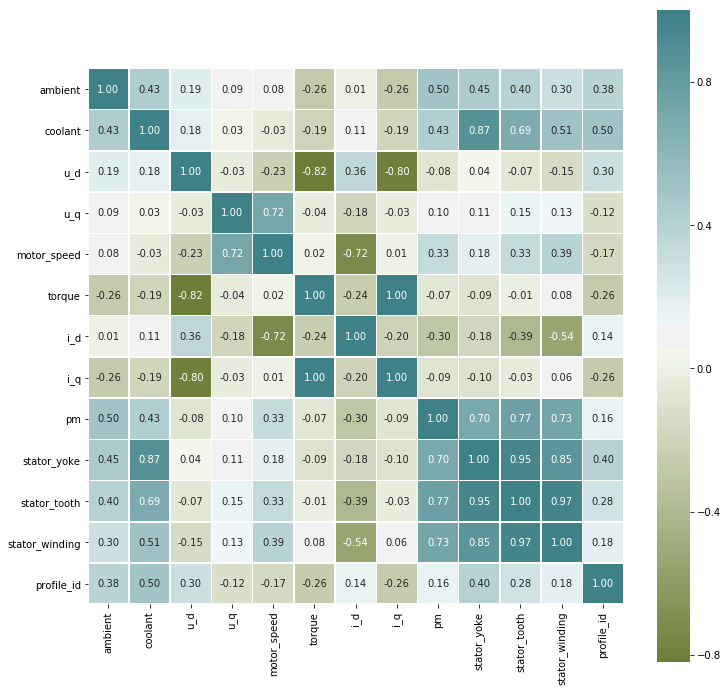

In [13]:
f,ax=plt.subplots(figsize=(12,12))

sns.heatmap(corr_temp, annot=True, linewidths=.5, fmt='.2f', 
            mask= np.zeros_like(corr_temp,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

In [14]:
y = temp.iloc[:,np.r_[8,-1]]

In [15]:
y.head()

,pm,profile_id
0,-2.522071,4
1,-2.522418,4
2,-2.522673,4
3,-2.521639,4
4,-2.521900,4


In [16]:
x = temp.iloc[:, temp.columns != "pm"]

In [17]:
x.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-1.830498,-2.062795,-2.018145,4


In [18]:
mnk.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
mnk.intercept_

array([ 1.20950222e-01, -3.05533376e-13])

In [20]:
mnk.coef_

array([[ 2.28917957e-01, -2.43903379e-01, -2.32919886e-02,
        -3.46511415e-01,  3.28004478e-01,  5.40084836e-02,
         1.76829902e-01, -3.45091956e-02, -1.54700914e+00,
         4.52467007e+00, -2.26632173e+00, -2.40611203e-03],
       [ 9.92304817e-14,  1.14789742e-13, -3.61310749e-14,
         5.08970683e-14, -4.60650479e-14,  1.28772317e-14,
        -2.49282105e-14, -1.46407981e-14, -2.54981791e-14,
         8.20015735e-14, -4.09529318e-14,  1.00000000e+00]])

In [21]:
x_new = x.mean().values.reshape(1,-1)

In [22]:
x_new

array([[-3.90549208e-03,  4.72251019e-03,  4.78041829e-03,
        -5.68972252e-03, -6.33550799e-03, -3.33285043e-03,
         6.04297096e-03, -3.19401557e-03,  6.09140300e-04,
        -2.20773772e-03, -3.93476002e-03,  5.07320008e+01]])

In [39]:
mnk.predict(x_new)

array([[-4.39579466e-03,  5.07320008e+01]])

In [24]:
x_std = (x-x.mean(axis=0))/x.std(axis=0)

In [25]:
x_std.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,profile_id
count,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05
mean,-3.610023e-13,2.148898e-13,-6.967515e-15,5.266386e-16,-2.328349e-14,3.632011e-13,-2.871728e-15,1.645897e-14,-1.226009e-13,7.215621e-14,-1.842094e-15,1.067180e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.629360e+00,-1.430605e+00,-1.663684e+00,-1.851459e+00,-1.363518e+00,-3.349632e+00,-3.255190e+00,-3.345430e+00,-1.833373e+00,-2.064766e+00,-2.019385e+00,-2.117145e+00
25%,-5.996010e-01,-1.040127e+00,-8.329064e-01,-9.195573e-01,-9.443952e-01,-2.641374e-01,-7.631066e-01,-2.546065e-01,-7.470907e-01,-7.600490e-01,-7.228850e-01,-8.486338e-01
50%,2.719318e-01,-1.814696e-01,2.633205e-01,-9.390934e-02,-1.337458e-01,-1.842994e-01,2.081014e-01,-1.872726e-01,-5.777421e-02,7.295647e-03,1.048858e-02,2.386612e-01
75%,6.953601e-01,6.444247e-01,3.544627e-01,8.563197e-01,8.588634e-01,5.516582e-01,1.008947e+00,5.035053e-01,6.960048e-01,7.747588e-01,7.308063e-01,7.823088e-01
max,2.991584e+00,2.637917e+00,2.274781e+00,1.795005e+00,2.028006e+00,3.026640e+00,1.055956e+00,2.923482e+00,2.445983e+00,2.329814e+00,2.662128e+00,1.371260e+00


In [26]:
mnk_std = sklearn.linear_model.LinearRegression()

In [27]:
mnk_std.fit(x_std, (y-y.mean())/y.std())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
pd.Series(mnk_std.coef_, index=x.columns.to_list()).round(4)

ValueError: Length of passed values is 2, index implies 12

In [29]:
y_pred = mnk_std.predict(x)

In [30]:
y_pred[0:10]

array([[-1.84209849,  4.        ],
       [-1.84265359,  4.        ],
       [-1.84201859,  4.        ],
       [-1.83607421,  4.        ],
       [-1.83131508,  4.        ],
       [-1.8261322 ,  4.        ],
       [-1.82141425,  4.        ],
       [-1.81916057,  4.        ],
       [-1.82040852,  4.        ],
       [-1.81821022,  4.        ]])

In [31]:
y[0:10]

,pm,profile_id
0,-2.522071,4
1,-2.522418,4
2,-2.522673,4
3,-2.521639,4
4,-2.521900,4
5,-2.522203,4
6,-2.522538,4
7,-2.522844,4
8,-2.522808,4
9,-2.522677,4


In [32]:
mnk_std.score(x,y)

0.9819629366653614

In [33]:
sklearn.metrics.r2_score(y, y_pred)

-3.4412096448524387

In [34]:
sklearn.metrics.mean_squared_error(y, y_pred)

4.4029713301080085

In [35]:
x_ucz = x[x.profile_id != 65]
x_ucz = x_ucz[x_ucz.profile_id != 72]
y_ucz = y[y.profile_id != 65]
y_ucz = y_ucz[y_ucz.profile_id != 72]
x_test = x[x.profile_id == 65]
y_test = y[y.profile_id == 65]


print(x_ucz.shape)
print(x_test.shape)
print(y_ucz.shape)
print(y_test.shape)

(942677, 12)
(40093, 12)
(942677, 2)
(40093, 2)


In [36]:
def fit_regression(x_ucz, x_test, y_ucz, y_test):
    r = sklearn.linear_model.LinearRegression()
    r.fit(x_ucz, y_ucz)
    y_ucz_pred = r.predict(x_ucz)
    y_test_pred = r.predict(x_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    #acc = sklearn.metrics.precision_score
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred),
     #   "ACC_ucz": acc(y_ucz, y_ucz_pred),
      #  "ACC_test": acc(y_test_pred, y_test)
    }

In [37]:
params = ["Reg. liniowa"]
res = [fit_regression(x_ucz, x_test, y_ucz, y_test)]
pd.DataFrame(res, index=params)

,r_score_u,r_score_t,MSE_u,MSE_t,MAE_u,MAE_t
Reg. liniowa,0.886356,0.42367,0.113966,0.070112,0.18198,0.152878


In [221]:
y_std = (y-y.mean())/y.std()

In [222]:
y_std.describe()

,pm,profile_id
count,9.980700e+05,9.980700e+05
mean,9.074060e-16,1.067180e-12
std,1.000000e+00,1.000000e+00
min,-2.638979e+00,-2.117145e+00
25%,-6.708054e-01,-8.486338e-01
50%,9.919084e-02,2.386612e-01
75%,6.880553e-01,7.823088e-01
max,2.934511e+00,1.371260e+00


In [233]:
params = ["Reg. liniowa"]
res = [fit_regression(x_ucz, x_test, y_ucz, y_test)]
pd.DataFrame(res, index=params)

ValueError: continuous-multioutput is not supported

In [224]:
x_ucz1 = x_ucz.iloc[:, x_ucz.columns != 'profile_id']
x_test1 = x_test.iloc[:, x_test.columns != 'profile_id']
y_ucz1 = y_ucz.iloc[:, y_ucz.columns != 'profile_id']
y_test1 = y_test.iloc[:, y_test.columns != 'profile_id']

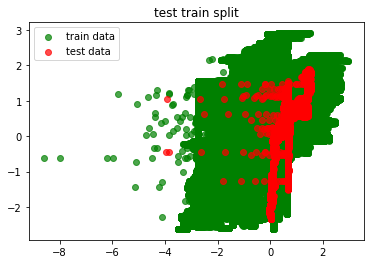

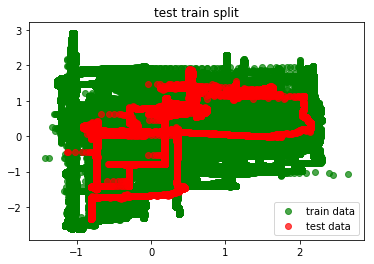

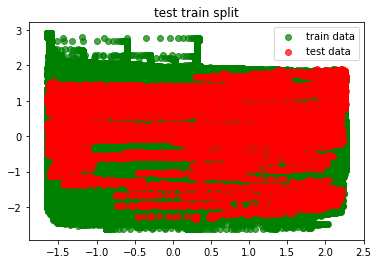

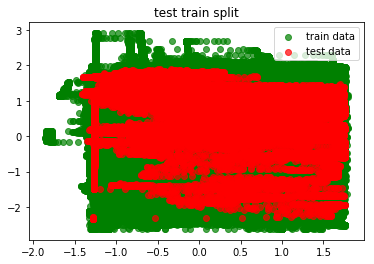

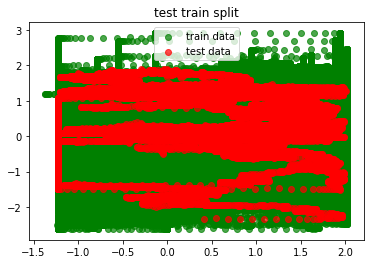

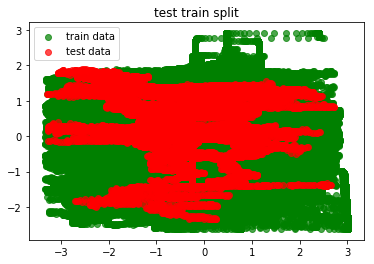

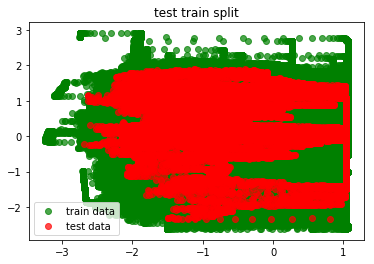

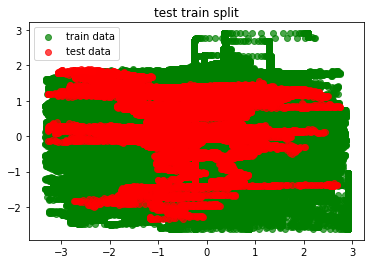

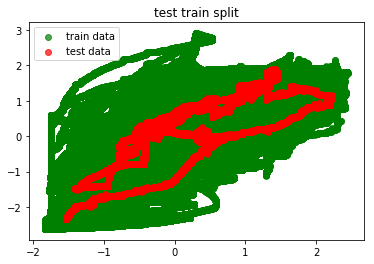

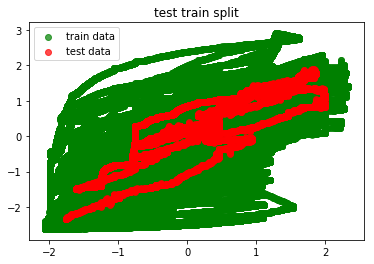

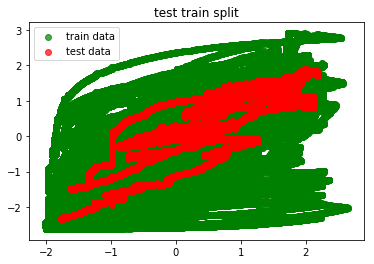

In [225]:
for i in range(11):  
    plt.scatter(x_ucz1.iloc[:, i], y_ucz1, label='train data', color='g', alpha = .7)
    plt.scatter(x_test1.iloc[:, i], y_test1, label='test data', color='r', alpha = .7)
    plt.legend()
    plt.title("test train split")
    plt.show()

In [240]:
temp['overheat'] = pd.cut(temp['pm'], [-3, -1, 1, 3], right = False, labels=["low", "normal", "high"])
temp['overheat'].value_counts()

normal    670024
low       171324
high      156722
Name: overheat, dtype: int64

In [244]:
temp.iloc[30010:30030,:]

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,overheat
30010,0.385313,-1.071393,0.313768,-0.710913,-0.951889,-0.256410,1.029177,-0.245720,-1.610824,-1.746294,-1.977195,-1.910207,4,low
30011,0.355526,-1.069856,0.313252,-0.711254,-0.951890,-0.256386,1.029147,-0.245721,-1.610857,-1.746294,-1.972396,-1.909908,4,low
30012,0.311067,-1.067991,0.313279,-0.711234,-0.951876,-0.256247,1.029137,-0.245714,-1.611072,-1.746294,-1.976184,-1.909257,4,low
30013,0.267315,-1.066606,0.313285,-0.711736,-0.951889,-0.256288,1.029165,-0.245711,-1.611513,-1.746294,-1.971807,-1.910066,4,low
30014,0.243432,-1.066237,0.313267,-0.711462,-0.951889,-0.256316,1.029132,-0.245721,-1.611848,-1.746294,-1.972917,-1.910916,4,low
30015,0.227931,-1.066904,0.313502,-0.711422,-0.951871,-0.256350,1.029111,-0.245728,-1.612467,-1.746294,-1.973666,-1.910458,4,low
30016,0.215684,-1.067816,0.313463,-0.711380,-0.951893,-0.256386,1.029167,-0.245716,-1.612937,-1.746294,-1.974249,-1.910508,4,low
30017,0.206444,-1.068380,0.313535,-0.711586,-0.951891,-0.256258,1.029144,-0.245723,-1.613016,-1.746294,-1.977512,-1.912068,4,low
30018,0.199781,-1.069300,0.313231,-0.712190,-0.951874,-0.256361,1.029133,-0.245712,-1.612797,-1.746294,-1.979850,-1.912734,4,low
30019,0.189346,-1.071245,0.312971,-0.712257,-0.951889,-0.256370,1.029195,-0.245719,-1.612561,-1.746294,-1.981525,-1.911902,4,low


In [245]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 14 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
overheat          998070 non-null category
dtypes: category(1), float64(12), int64(1)
memory usage: 99.9 MB


In [246]:
Y = temp["overheat"]
Y[0:10]

0    low
1    low
2    low
3    low
4    low
5    low
6    low
7    low
8    low
9    low
Name: overheat, dtype: category
Categories (3, object): [low < normal < high]

In [247]:
yk = Y.cat.codes.values
yk[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [248]:
len(yk)

998070

In [249]:
i = np.random.choice(np.arange(len(yk)), 10, replace=False)
print(yk[i])
print(Y[i].values)

[1 1 1 2 0 1 1 0 1 1]
[normal, normal, normal, high, low, normal, normal, low, normal, normal]
Categories (3, object): [low < normal < high]


In [250]:
 temp.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,overheat
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4,low
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4,low
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4,low
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4,low
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4,low


In [251]:
X = temp.iloc[:,:12]
X.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145


In [252]:
np.arange(X.shape[0])

array([     0,      1,      2, ..., 998067, 998068, 998069])

In [253]:
idx_ucz, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size = 0.2, random_state=12345)

X_ucz, X_test = X.iloc[idx_ucz, :], X.iloc[idx_test, :]
Y_ucz, Y_test = Y[idx_ucz], Y[idx_test]
yk_ucz, yk_test = yk[idx_ucz], yk[idx_test]

X_ucz.shape, X_test.shape, Y_ucz.shape, Y_test.shape

((798456, 12), (199614, 12), (798456,), (199614,))

In [268]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_ucz, yk_ucz)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [270]:
yk_pred = knn.predict(X_test)
yk_pred[[0, 250, 1000, 750, 10000]]

array([1, 1, 0, 1, 2], dtype=int8)

In [271]:
Y_test.values[[0,500,1000,5000,10000]]

[normal, normal, low, low, high]
Categories (3, object): [low < normal < high]

In [272]:
Y_pred = Y.cat.categories[yk_pred]
Y_pred[[0, 500, 1000, 5000, 10000]]

Index(['normal', 'normal', 'low', 'low', 'high'], dtype='object')

In [273]:
import sklearn.metrics
sklearn.metrics.accuracy_score(yk_test, yk_pred)

0.9970693438335988

In [274]:
knn.score(X_test, yk_test)

0.9970693438335988

In [275]:
sklearn.metrics.confusion_matrix(yk_test, yk_pred)

array([[ 34210,     95,      0],
       [   112, 133817,    182],
       [     0,    196,  31002]], dtype=int64)

In [289]:
def fit_classifier(alg, X_ucz, X_test, Y_ucz, Y_test):
    alg.fit(X_ucz, Y_ucz)
    Y_pred_ucz = alg.predict(X_ucz)
    Y_pred_test = alg.predict(X_test)
    return{
        "ACC_ucz": sklearn.metrics.accuracy_score(Y_pred_ucz, Y_ucz),
        "ACC_test": sklearn.metrics.accuracy_score(Y_pred_test, Y_test),
        "P_ucz": sklearn.metrics.precision_score(Y_pred_ucz, Y_ucz, average='micro'),
        "P_test": sklearn.metrics.precision_score(Y_pred_test, Y_test, average='micro'),
        "R_ucz": sklearn.metrics.recall_score(Y_pred_ucz, Y_ucz, average='micro'),
        "R_test": sklearn.metrics.recall_score(Y_pred_test, Y_test, average='micro'),
        "F1_ucz": sklearn.metrics.f1_score(Y_pred_ucz, Y_ucz, average='micro'),
        "F1_test": sklearn.metrics.f1_score(Y_pred_test, Y_test, average='micro')
    }

In [290]:
pd.Series(fit_classifier(knn, X_ucz, X_test, yk_ucz, yk_test))

ACC_ucz     0.998215
ACC_test    0.997069
P_ucz       0.998215
P_test      0.997069
R_ucz       0.998215
R_test      0.997069
F1_ucz      0.998215
F1_test     0.997069
dtype: float64